In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


In [2]:
class EpanechnikovKDE:
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth
        self.data = None

    def fit(self, data):

        self.data = np.array(data)

    def epanechnikov_kernel(self, x, xi):

        x = (x - xi) / self.bandwidth
        norm_x = np.linalg.norm(x)
        if ( norm_x <= 1 ):
            return 3/4 * (1 - norm_x**2)  
        else:
            return 0.0


    def predict(self, x_hat ,yi):

        sum = np.sum([self.epanechnikov_kernel(x_hat , xi) for xi in self.data])
        if ( sum == 0 ) :
            return 0
        weights = np.array([self.epanechnikov_kernel(x_hat , xi) for xi in self.data])/sum
        return np.dot(weights, yi)


In [3]:
class GaussianKDE:
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth
        self.data = None

    def fit(self, data):

        self.data = np.array(data)


    def gaussian_kernel(self, x, xi):
        x = (x - xi) / self.bandwidth
        norm_x = np.linalg.norm(x)
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * norm_x**2)


    def predict(self, x_hat ,yi):

        sum = np.sum([self.gaussian_kernel(x_hat , xi) for xi in self.data])
        if ( sum == 0 ) :
            return 0
        weights = np.array([self.gaussian_kernel(x_hat , xi) for xi in self.data])/sum
        return np.dot(weights, yi)


In [4]:
#extracting data from the csv file
data = pd.read_csv(filepath_or_buffer=r'data.csv', sep=r'\s+', header=None)


#selecting the columns to be used %Al and RI
Y_x = data.iloc[:, [1, 4]]

x_train = np.array(Y_x.iloc[ : , 1])
y_train = np.array(Y_x.iloc[ : , 0])




#performing cross validation using LOOCV
def LOOCV(x_train, y_train , bandwidth):
    n = len(x_train)
    sum = 0
    global optimal_risk
    global optimal_bandwidth  

    for i in range(n):
        x_train_new = np.delete(x_train, i)
        y_train_new = np.delete(y_train, i)
        x_test = x_train[i]
        y_test = y_train[i]
        kde = GaussianKDE(bandwidth=bandwidth)
        kde.fit(x_train_new)
        y_hat = kde.predict(x_hat=x_test, yi=y_train_new)
        sum += (y_hat - y_test)**2
    
    if ( sum < optimal_risk):
        optimal_risk = sum
        optimal_bandwidth = bandwidth
    return sum/n



bandwidth_values = np.linspace(0.01, 2, 100)
optimal_bandwidth = 100
optimal_risk = 1000000
mse_values = [LOOCV(x_train, y_train,bandwidth) for bandwidth in bandwidth_values]
print(optimal_bandwidth)





#Kernel density estimation predictions for gaussian kernel
kde = GaussianKDE(bandwidth=0.01)
kde.fit(x_train)

x_test = np.linspace(-0.5, 5, 200)

y_test_undersmoothed = [kde.predict(x_hat=x, yi=y_train) for x in x_test]
kde.bandwidth = 1
y_test_oversmoothed = [kde.predict(x_hat=x, yi=y_train) for x in x_test]
kde.bandwidth = optimal_bandwidth
y_test_right = [kde.predict(x_hat=x, yi=y_train) for x in x_test]





0.13060606060606061


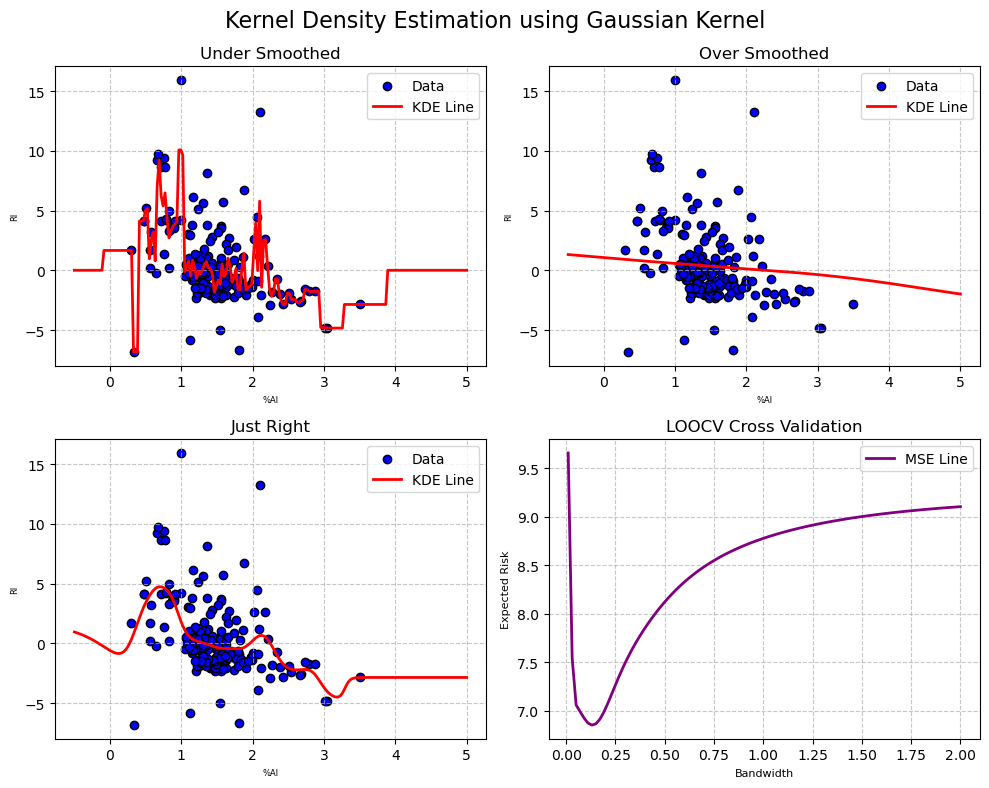

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Main title for the entire figure
fig.suptitle('Kernel Density Estimation using Gaussian Kernel', fontsize=16)

# First plot (top left)
axs[0,0].scatter(x_train, y_train, color='blue', label='Data', marker='o', edgecolor='k')
axs[0, 0].plot(x_test, y_test_undersmoothed, color='red' , label = 'KDE Line', linewidth =2 )
axs[0, 0].set_title('Under Smoothed')
axs[0,0].set_xlabel('%Al', fontsize=6)
axs[0,0].set_ylabel('RI', fontsize=6)
axs[0,0].grid(True, linestyle='--', alpha=0.7)
axs[0, 0].legend()

# Second plot (top right)
axs[0,1].scatter(x_train, y_train, color='blue', label='Data', marker='o', edgecolor='k')
axs[0, 1].plot(x_test, y_test_oversmoothed, color='red' , label = 'KDE Line', linewidth =2 )
axs[0, 1].set_title('Over Smoothed')
axs[0,1].set_xlabel('%Al', fontsize=6)
axs[0,1].set_ylabel('RI', fontsize=6)
axs[0,1].grid(True, linestyle='--', alpha=0.7)
axs[0, 1].legend()

# Third plot (bottom left)
axs[1,0].scatter(x_train, y_train, color='blue', label='Data', marker='o', edgecolor='k')
axs[1, 0].plot(x_test, y_test_right, color='red' , label = 'KDE Line', linewidth =2 )
axs[1, 0].set_title('Just Right')
axs[1,0].set_xlabel('%Al', fontsize=6)
axs[1,0].set_ylabel('RI', fontsize=6)
axs[1,0].grid(True, linestyle='--', alpha=0.7)
axs[1, 0].legend()

# Fourth plot (bottom right)
axs[1, 1].plot(bandwidth_values, mse_values, color='purple' , label = 'MSE Line', linewidth =2 )
axs[1, 1].set_title('LOOCV Cross Validation')
axs[1,1].set_xlabel('Bandwidth', fontsize=8)
axs[1,1].set_ylabel('Expected Risk', fontsize=8)
axs[1,1].grid(True, linestyle='--', alpha=0.7)
axs[1, 1].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()  # Adjust layout to make room for main title

# Display the plot
plt.savefig('gaussian_kernel_regression.png')
plt.show()





In [6]:
#extracting data from the csv file
data = pd.read_csv(filepath_or_buffer=r'data.csv', sep=r'\s+', header=None)


#selecting the columns to be used %Al and RI
Y_x = data.iloc[:, [1, 4]]

x_train = np.array(Y_x.iloc[ : , 1])
y_train = np.array(Y_x.iloc[ : , 0])




#performing cross validation using LOOCV
def LOOCV(x_train, y_train , bandwidth):
    n = len(x_train)
    sum = 0
    global optimal_risk
    global optimal_bandwidth  

    for i in range(n):
        x_train_new = np.delete(x_train, i)
        y_train_new = np.delete(y_train, i)
        x_test = x_train[i]
        y_test = y_train[i]
        kde = EpanechnikovKDE(bandwidth=bandwidth)
        kde.fit(x_train_new)
        y_hat = kde.predict(x_hat=x_test, yi=y_train_new)
        sum += (y_hat - y_test)**2
    
    if ( sum < optimal_risk):
        optimal_risk = sum
        optimal_bandwidth = bandwidth
    return sum/n



bandwidth_values = np.linspace(0.01, 2, 100)
optimal_bandwidth = 100
optimal_risk = 1000000
mse_values = [LOOCV(x_train, y_train,bandwidth) for bandwidth in bandwidth_values]
print(optimal_bandwidth)





#Kernel density estimation predictions for gaussian kernel
kde = EpanechnikovKDE(bandwidth=0.01)
kde.fit(x_train)

x_test = np.linspace(-0.5, 5, 200)

y_test_undersmoothed = [kde.predict(x_hat=x, yi=y_train) for x in x_test]
kde.bandwidth = 1.2
y_test_oversmoothed = [kde.predict(x_hat=x, yi=y_train) for x in x_test]
kde.bandwidth = optimal_bandwidth
y_test_right = [kde.predict(x_hat=x, yi=y_train) for x in x_test]





0.33161616161616164


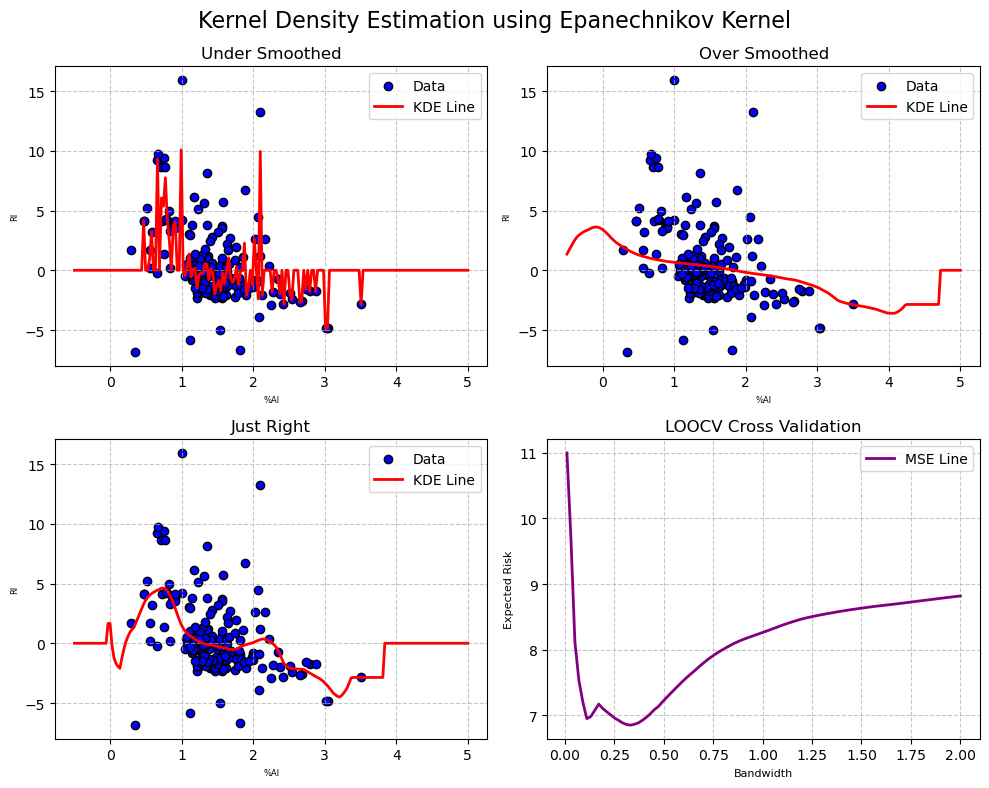

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Main title for the entire figure
fig.suptitle('Kernel Density Estimation using Epanechnikov Kernel', fontsize=16)

# First plot (top left)
axs[0,0].scatter(x_train, y_train, color='blue', label='Data', marker='o', edgecolor='k')
axs[0, 0].plot(x_test, y_test_undersmoothed, color='red' , label = 'KDE Line', linewidth =2 )
axs[0, 0].set_title('Under Smoothed')
axs[0,0].set_xlabel('%Al', fontsize=6)
axs[0,0].set_ylabel('RI', fontsize=6)
axs[0,0].grid(True, linestyle='--', alpha=0.7)
axs[0, 0].legend()

# Second plot (top right)
axs[0,1].scatter(x_train, y_train, color='blue', label='Data', marker='o', edgecolor='k')
axs[0, 1].plot(x_test, y_test_oversmoothed, color='red' , label = 'KDE Line', linewidth =2 )
axs[0, 1].set_title('Over Smoothed')
axs[0,1].set_xlabel('%Al', fontsize=6)
axs[0,1].set_ylabel('RI', fontsize=6)
axs[0,1].grid(True, linestyle='--', alpha=0.7)
axs[0, 1].legend()

# Third plot (bottom left)
axs[1,0].scatter(x_train, y_train, color='blue', label='Data', marker='o', edgecolor='k')
axs[1, 0].plot(x_test, y_test_right, color='red' , label = 'KDE Line', linewidth =2 )
axs[1, 0].set_title('Just Right')
axs[1,0].set_xlabel('%Al', fontsize=6)
axs[1,0].set_ylabel('RI', fontsize=6)
axs[1,0].grid(True, linestyle='--', alpha=0.7)
axs[1, 0].legend()

# Fourth plot (bottom right)
axs[1, 1].plot(bandwidth_values, mse_values, color='purple' , label = 'MSE Line', linewidth =2 )
axs[1, 1].set_title('LOOCV Cross Validation')
axs[1,1].set_xlabel('Bandwidth', fontsize=8)
axs[1,1].set_ylabel('Expected Risk', fontsize=8)
axs[1,1].grid(True, linestyle='--', alpha=0.7)
axs[1, 1].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()  # Adjust layout to make room for main title

# Display the plot
plt.savefig('epanechnikov_kernel_regression.png')
plt.show()



